# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [76]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


- Gender: 범주형
- Age: 수치형
- Annual Income: 수치형
- Spending Score: 수치형

- 결측치 없음

## 1. Preprocssing / EDA

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Categorical

<Axes: xlabel='Gender', ylabel='count'>

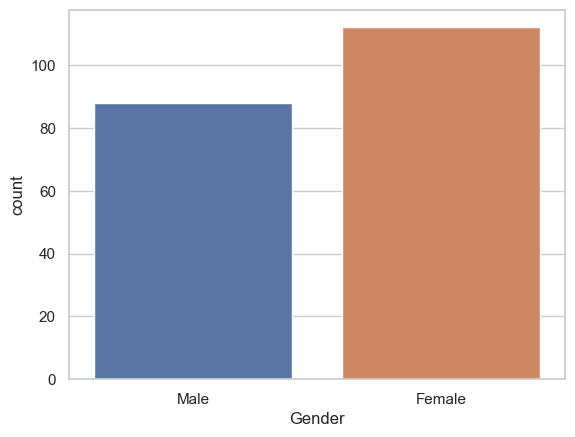

In [7]:
sns.set_theme(style="whitegrid")

sns.countplot(data=df, x='Gender')

In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#### Gender 변수 인코딩

In [77]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

### Numerical

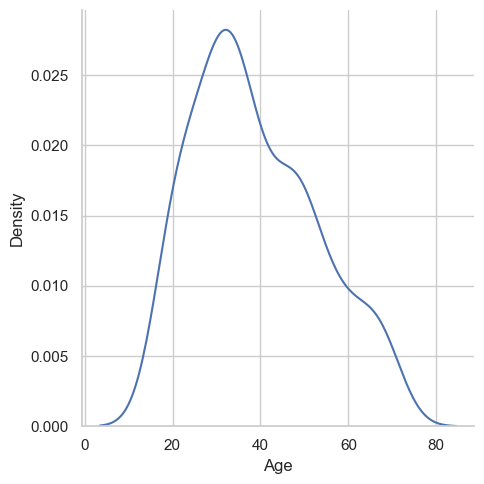

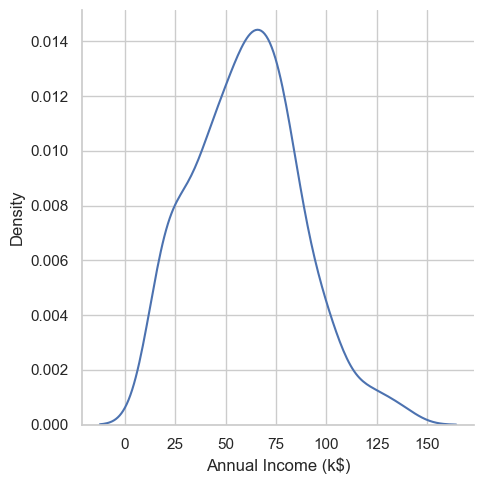

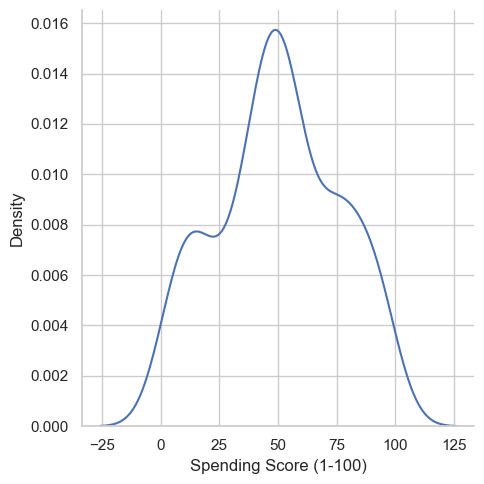

In [11]:
for col in df.columns[1:]:
    sns.displot(df, x=col, kind="kde")

- age는 약간 right skewed됨.

## 2. Clustering, Evaluation

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### K-Means

#### 군집 수 결정

In [34]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'sse')

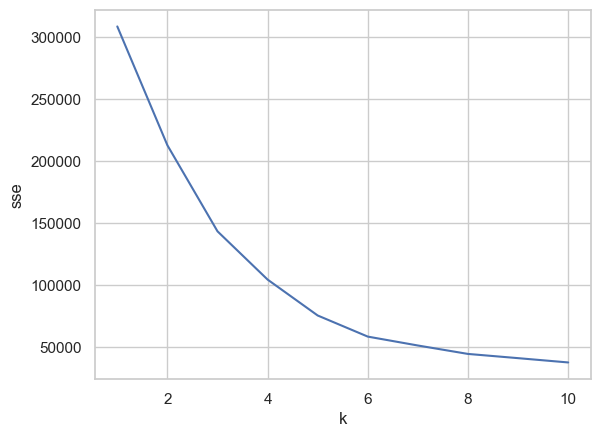

In [35]:
plt.plot(range(1,11), inertia)
plt.xlabel('k')
plt.ylabel('sse')

- 급격하게 감소하는 지점은 보이지 않음
- 3 ~ 6 사이의 값으로 선택할 수 있을 것으로 보임

In [41]:
from sklearn.metrics import silhouette_score

k = [3,4,5,6]
init = ['k-means++', 'random']

combinations = [(i, j) for i in k for j in init]

silhouette = []

for comb in combinations:
    kmeans = KMeans(n_clusters=comb[0], init=comb[1], random_state=42)
    label = kmeans.fit_predict(df)
    silhouette.append(silhouette_score(df, label))

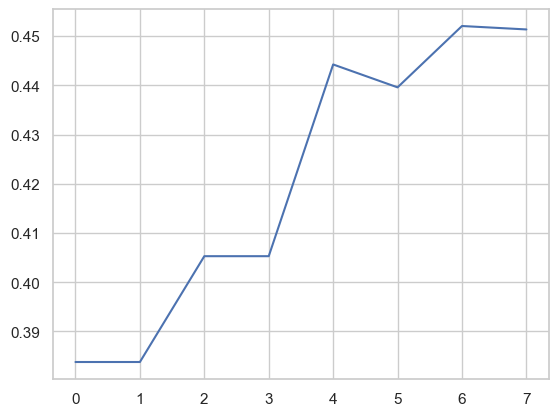

In [45]:
plt.plot(range(0,8), silhouette)

In [46]:
combinations[6]

(6, 'k-means++')

- 군집 수는 6, initial centroid를 선택하는 방법은 k-means++를 쓸 때 silhouette score가 가장 높다.

#### Visualization

In [48]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
df['cluster']= kmeans.fit_predict(df)

In [49]:
c1=df[df['cluster']==0]
c2=df[df['cluster']==1]
c3=df[df['cluster']==2]
c4=df[df['cluster']==3]
c5=df[df['cluster']==4]
c6=df[df['cluster']==5]

Text(0, 0.5, 'Spending Score')

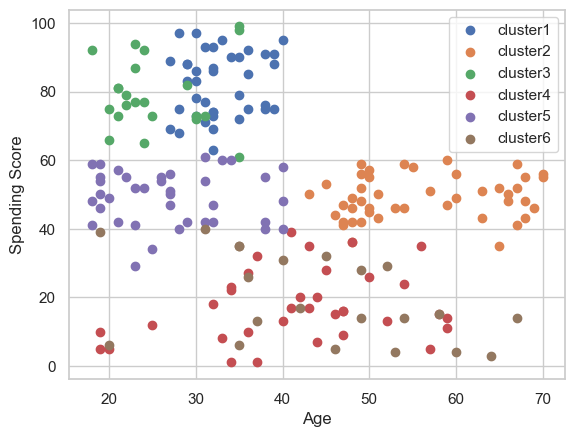

In [53]:
plt.scatter(c1['Age'],c1['Spending Score (1-100)'],label='cluster1')
plt.scatter(c2['Age'],c2['Spending Score (1-100)'],label='cluster2')
plt.scatter(c3['Age'],c3['Spending Score (1-100)'],label='cluster3')
plt.scatter(c4['Age'],c4['Spending Score (1-100)'],label='cluster4')
plt.scatter(c5['Age'],c5['Spending Score (1-100)'],label='cluster5')
plt.scatter(c6['Age'],c6['Spending Score (1-100)'],label='cluster6')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Spending Score')

cluster4와 cluster6은 조금 잘못 클러스터링된 듯함....

### DBSCAN

In [62]:
dbscan = DBSCAN()
df['cluster']= dbscan.fit_predict(df)

In [64]:
df['cluster'].unique()

array([-1], dtype=int64)

- 다 noisy sample로 취급됨 ???

#### 결과가 이상하니 scaling을 해줘보자

In [93]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [87]:
df_cp = df.copy()

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sc = scaler.fit_transform(df.iloc[:, 1:])

In [95]:
dbscan = DBSCAN(min_samples=10)
df['cluster']= dbscan.fit_predict(df_sc)

In [96]:
df['cluster'].unique()

array([-1,  0,  1,  2,  3], dtype=int64)

In [81]:
c1=df[df['cluster']==0]
c2=df[df['cluster']==1]
c3=df[df['cluster']==2]
c4=df[df['cluster']==3]
c5=df[df['cluster']==4]

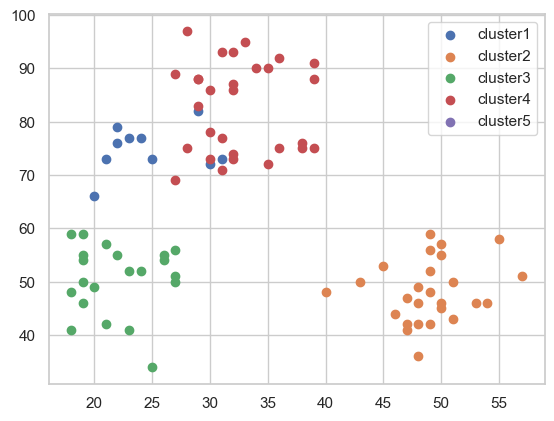

In [83]:
plt.scatter(c1['Age'],c1['Spending Score (1-100)'],label='cluster1')
plt.scatter(c2['Age'],c2['Spending Score (1-100)'],label='cluster2')
plt.scatter(c3['Age'],c3['Spending Score (1-100)'],label='cluster3')
plt.scatter(c4['Age'],c4['Spending Score (1-100)'],label='cluster4')
plt.scatter(c5['Age'],c5['Spending Score (1-100)'],label='cluster5')
plt.legend()

클러스터1과 클러스터4는 경계부분이 약간 겹침

In [101]:
print('silhoutte score is:', silhouette_score(df.iloc[:, :-1], df['cluster']))

silhoutte score is: 0.04179526840432755
